# Final Project - Group 49
## Introduction
When looking for how to find a “best” neighborhood in Pittsburgh, we considered a couple different ways to measure this objective ranking. Ultimately, we decided to go with an ironic approach. The other option that we were considering was to look at the neighborhood with the least “unhealthy vendors,” but to make the analysis more fun and  interesting, we used a metric that would determine the best neighborhood based on an unhealthy lifestyle. We chose to analyze the datasets for the most frequently appearing zip codes under each metric and matched these zip codes with corresponding neighborhoods. Because zip codes do not directly correspond to neighborhoods (for example, they can span across multiple neighborhoods or a neighborhood can have multiple zip codes), we chose to specifically look at zip codes that were associated with Pittsburgh neighborhoods and generally match the zip code’s area. 
## The Metric
Our metric we chose was: “bad for the body, good for the soul.”  We looked for the neighborhoods which had the most frequent stores or restaurants providing fun, unhealthy goods.  This led us to our three datasets: fast food locations, convenience store locations, and tobacco store locations.

In [2]:
import pandas as pd
import geopandas
%matplotlib inline

## The Best Neighborhood
Using zipcodes to determine neighborhoods created some issues, since some zipcodes spanned multiple neighborhoods, and some zipcodes were actually outside of Pittsburgh.  Therefore, we used two websites to standardize our results.
<br>
https://www.unitedstateszipcodes.org/
<br>
This was the website used to determine which neighborhood the zipcode represented.  The site would either list the actual neighborhood name, or list an alternate acceptable name for the city, which we used as the neighborhood.
<br>
https://www.visitpittsburgh.com/neighborhoods/
<br
This website was our universally used list to determine which neighborhoods were fair use.  If the neighborhood associated with the zipcode wasn't on this list, the zipcode was deemed invalid and wouldn't be considered for the best neighborhood in Pittsburgh. 
### Fast Food Locations

In [2]:
fastfood = pd.read_csv("fastfoodalleghenycountyupdatexy2.csv")
fastfood.head(10)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,ZIP_Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/14,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/04,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/97,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/01,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/99,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out
5,Angelia's Pizza,JNG Pizza LLC,5/11/04,202,Moon Clinton Rd,15108,40.513135,-80.223406,Take Out
6,Angelia's Pizza / Chill Frozen Dessserts,Eaton Pizza Inc,10/7/05,410,Penn Lincoln Dr,15126,40.442466,-80.235992,Take Out
7,Antney's Ice Cream,The Iceman Inc,4/11/02,1316,Poplar St,15205,40.427470,-80.052435,"Breakfast, Drink, Other"
8,Arby's,Kinco Inc,1/1/75,1617,Freeport Rd,15065,40.622125,-79.727516,Dollar Menu
9,Arby's #8,Linell Corporation,12/3/07,3974,Wm Penn Hwy,15146,40.437988,-79.772845,Dollar Menu


In [3]:
zipcode = fastfood.groupby('ZIP_Code').count()
zipcode.sort_values(by=['Name'], ascending = False)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15146,51,50,51,49,51,51,51,51
15222,46,43,46,46,46,46,46,46
15237,44,40,44,44,44,44,44,44
15213,38,37,38,38,38,38,38,38
15205,36,30,36,36,36,36,36,36
...,...,...,...,...,...,...,...,...
15148,1,1,1,1,1,1,1,1
15207,1,1,1,1,1,1,1,1
15208,1,1,1,1,1,1,1,1


In [4]:
zipcode = fastfood.groupby('ZIP_Code').count()
zipcode_sorted = zipcode.sort_values(by=['Name'], ascending = False)
zipcode_sorted.head(15)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15146,51,50,51,49,51,51,51,51
15222,46,43,46,46,46,46,46,46
15237,44,40,44,44,44,44,44,44
15213,38,37,38,38,38,38,38,38
15205,36,30,36,36,36,36,36,36
15219,27,23,27,27,27,27,27,27
15236,25,22,25,24,25,25,25,25
15235,22,21,22,22,22,22,22,22
15102,21,20,21,21,21,21,21,21


TOP 10 ZIPCODES: 
<br>
15146 - Monroeville, PA <br>
15222 - Troy Hill <br>
15237 - McKnight <br>
15213 - Oakland <br>
15205 - Crafton <br>
15219 - Central Business District / Downtown <br>
15236 - Pleasant Hills / West Mifflin <br>
15235 - Penn Hills <br>
15102 - Bethel Park, PA <br>
15217 - Squirrel Hill <br>


In [12]:
remove_invalid = zipcode_sorted.drop(zipcode_sorted.index[0])
remove_invalid = zipcode_sorted.drop(zipcode_sorted.index[8])
remove_invalid.head(15)

,Name,Legal_Name,Start_Date,Street_Number,Street_Name,Lat,Lon,Category
ZIP_Code,,,,,,,,
15146,51,50,51,49,51,51,51,51
15222,46,43,46,46,46,46,46,46
15237,44,40,44,44,44,44,44,44
15213,38,37,38,38,38,38,38,38
15205,36,30,36,36,36,36,36,36
15219,27,23,27,27,27,27,27,27
15236,25,22,25,24,25,25,25,25
15235,22,21,22,22,22,22,22,22
15217,20,20,20,20,20,20,20,20


### Convenience Stores

In [3]:
stores = pd.read_csv("convenience.csv", index_col = None)
stores.head(10)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store
5,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137.0,40.367923,-79.780429,9.0,Convenience Store
6,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231.0,40.494177,-80.267208,9.0,Convenience Store
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store
8,201310080001,Plow & Hearth,Plow & Hearth LLC,9/25/2013,1710,Settlers Ridge Center Dr,PA,15205.0,40.440641,-80.149132,5.0,Convenience Store
9,43192,S & R Market,Mac's Convenience Stores LLC,1/11/1988,4915,2nd Ave,PA,15207.0,40.529076,-80.025577,5.0,Convenience Store


Looking at the disparity between the number of convenience stores and supermarkets, we can see that there are many more of the latter:

In [4]:
stores["Category"].value_counts()

Convenience Store    515
Supermarket          156
Name: Category, dtype: int64

The top 20 most frequently appearing zip codes overall are as follows:

In [5]:
zips = stores["Zip"].value_counts()
zips.head(20)

15237.0    28
15146.0    22
15222.0    21
15132.0    19
15108.0    19
15210.0    18
15213.0    17
15136.0    17
15212.0    17
15219.0    17
15206.0    17
15235.0    16
15221.0    16
15236.0    16
15205.0    15
15227.0    15
15122.0    15
15090.0    12
15044.0    12
15217.0    11
Name: Zip, dtype: int64

The top 10:
1. 15237 - McKnight, McCandless, PA
2. 15146 - Monroeville, PA
3. 15222 - Troy Hill, Pittsburgh, PA
4. 15108 - Corapolis, PA
5. 15132 - McKeesport, PA
6. 15210 - St. Clair, Pittsburgh, PA
7. 15212 - Perry South, Pittsburgh, PA
8. 15213 - North Oakland, Pittsburgh, PA
9. 15206 - Larimer, Pittsburgh, PA
10. 15136 - McKees Rocks, PA

Out of these 10, the ones that are neighborhoods in Pittsburgh:
1. Troy Hill
2. St. Clair
3. Perry South
4. North Oakland
5. Larimer
(But these just means that they appear most often. We want to see which ones have the most convenience stores). 

In [8]:
convenience = stores[stores['Category'].str.contains('Convenience Store', na = False)]
print(convenience)

        Client ID                               Name  \
0    201211150002                        Avalon Fuel   
1    201511040005     Ez Energy #303/7Eleven #36183H   
2    201212130003  EZ Energy #311 / 7 Eleven #36191H   
3    201211190006     Getgo #3646 / Crafton - Ingram   
4           53583                   Mt NeBlvd Texaco   
..            ...                                ...   
510  201406230007                 Wm Penn Hwy Sunoco   
511  200410180001                         WN Grocery   
512  201407280005               Zoscak's Food Market   
513         45034                     Zozos Marathon   
514  200704260001                        GetGo #3137   

                         Legal Name  Start Date Street #  \
0               Avalon Fuel Company  10/26/2012      901   
1    Neelkanth Ansh Enterprises Inc  10/26/2015      209   
2                      7 Eleven Inc   12/3/2012     8136   
3                   Giant Eagle Inc  11/15/2012      280   
4                  Mt NeBlv

In [9]:
con_zip = convenience["Zip"].value_counts()
print(con_zip)

15237.0    18
15222.0    17
15108.0    16
15136.0    16
15219.0    16
           ..
15282.0     1
15030.0     1
15057.0     1
15018.0     1
15056.0     1
Name: Zip, Length: 87, dtype: int64


In [10]:
con_zip.head(15)

15237.0    18
15222.0    17
15108.0    16
15136.0    16
15219.0    16
15212.0    14
15213.0    14
15210.0    14
15146.0    14
15206.0    13
15221.0    13
15132.0    13
15236.0    12
15235.0    11
15227.0    10
Name: Zip, dtype: int64

Updated list with most frequently appearing zip codes filtered with convenience stores only. 
1. 15237 - McKnight, McCandless, PA
2. 15222 - Troy Hill, Pittsburgh, PA
3. 15219 - Downtown, Pittsburgh, PA
4. 15108 - Coraopolis, PA
5. 15136 - McKees Rocks, PA
6. 15212 - Perry South, Pittsburgh, PA
7. 15146 - Monroeville, Pittsburgh, PA
8. 15210 - St. Clair, Pittsburgh, PA
9. 15213 - North Oakland, Pittsburgh, PA
10. 15221 - Pittsburgh, PA

We then found which convenience stores appeared the most often:

In [11]:
store_name = convenience["Legal Name"].value_counts()
print(store_name)

Giant Eagle Inc            30
Sunoco Inc R&M             19
Sheetz Inc                 18
Co Go's                    13
7 Eleven Inc               11
                           ..
SGII Group LLC              1
Om Shiva Management Inc     1
Dave's BP LLC               1
Ukani Brothers Inc          1
Zozos Enterprises Inc       1
Name: Legal Name, Length: 245, dtype: int64


 However, after filtering it, we noticed that Giant Eagle was still included as a convenience store. Of course, Giant Eagle is “too healthy” for our metric, so the dataset was filtered once again to disclude it.

In [12]:
no_giant = convenience[convenience["Legal Name"].str.contains("Giant Eagle Inc") == False]
nogiant2 = no_giant["Legal Name"].value_counts()
print(nogiant2)

Sunoco Inc R&M             19
Sheetz Inc                 18
Co Go's                    13
7 Eleven Inc               11
Speedway LLC               10
                           ..
SGII Group LLC              1
Om Shiva Management Inc     1
Dave's BP LLC               1
Ukani Brothers Inc          1
Zozos Enterprises Inc       1
Name: Legal Name, Length: 244, dtype: int64


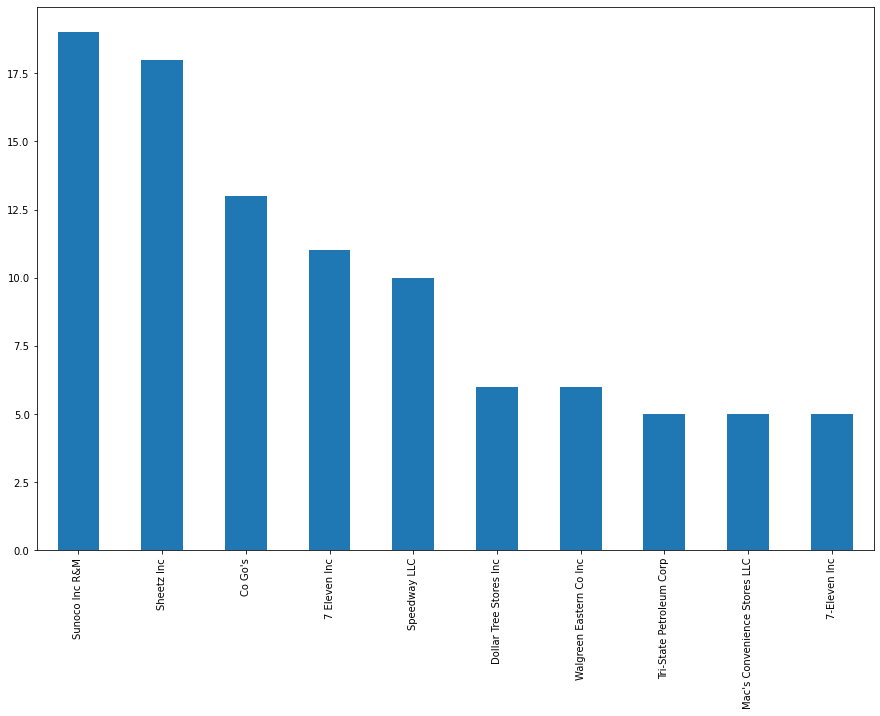

In [14]:
plotting = nogiant2.head(10)
plotting.plot.bar(figsize=(15, 10))

In [15]:
no_giant_zip = no_giant["Zip"].value_counts()
no_giant_zip.head(10)

15237.0    16
15108.0    13
15146.0    12
15132.0    11
15222.0    10
15136.0    10
15212.0     9
15213.0     9
15206.0     8
15236.0     8
Name: Zip, dtype: int64

Then, the most frequently appearing zip codes after removing Giant Eagle:
1. 15237 - McKnight, McCandless, PA
2. 15108 - Coraopolis, PA
3. 15146 - Monroeville, PA
4. 15132 - Mckeesport, PA
5. 15222 - Troy Hill, Pittsburgh, PA
6. 15136 - McKees Rocks, PA
7. 15212 - Perry South, Pittsburgh, PA
8. 15213 - Oakland, Pittsburgh, PA
9. 15236 - Pittsburgh
10. 15227 - Pittsburgh

Then, looking at the re-filtered data, we decided to pick a certain chain to be the “main'' convenience store of interest. 7 Eleven, with its fantastic selection of slurpees and frozen food was chosen. 

In [13]:
sevEleven = no_giant[no_giant["Legal Name"].str.contains("7 Eleven Inc")]
print(sevEleven["Zip"].value_counts())

15237.0    4
15101.0    2
15202.0    1
15226.0    1
15222.0    1
15225.0    1
15205.0    1
15136.0    1
Name: Zip, dtype: int64


Since 7 Eleven is a store with nutritional choices for grocery shopping, I chose to look at the zip codes with the most 7 Elevens. Narrowing it down to these, the above are the most frequently appearing zip codes. Based on this data, the zip code with the most 7 Elevens is associated with the neighborhood of Troy Hill.